In [75]:
import pandas as pd
import numpy as np
import polars as pl
import time
import matplotlib.pyplot as plt



### Let's open up the DF - assess how many participants remain after removing those with not enough data

In [76]:
#set path to REMOTES folder
path = '../../../data'

# Load the data
df = pd.read_csv(f'{path}/sensors_data.csv')

#open and read the text file with patient IDs to remove 
import ast

with open(f'{path}/patients_to_remove2.txt') as f:
    lines = f.read()  # Read the entire content
    patients_to_remove = ast.literal_eval(lines)  # Safely evaluate the string as a list

print(len(patients_to_remove))

#add these to ID's to the patients_to_remove list: ['R013', 'R029', 'R042', 'R078', 'R088', 'R135']
#patients_to_remove.extend(['R013', 'R029', 'R042', 'R078', 'R088', 'R135'])
print(len(patients_to_remove))


df = df[~df['Patient ID'].isin(patients_to_remove)]

print(len(df))


27
27
170


### 29 files removed for several reasons:
### - 5 files have under 24 hours of recorded data 
### - 17 files have under 16 hours of HR in first 24 hours
### - 5 files with over significant ectopic beats in recorded 5min period
### - 1 file corrupted
### - 1 incomplete CPET


In [77]:
#open the demo_data file 
demo_data = pd.read_csv(f'{path}/demo_data.csv')

#change the column title from study_id to Patient ID
demo_data = demo_data.rename(columns={'study_id': 'Patient ID'})

#merge the demo_data with the WS_data only keeping columns 'cpet_quality', cpet_bike, vo2peak_measured, anaerobic_threshold, bmi, age, gender
df = pd.merge(df, demo_data[['Patient ID', 'cpet_quality', 'cpet_bike', 'vo2peak_measured', 'anaerobicthreshold', 'bmi', 'gender', 'height', 'age']], on='Patient ID', how='left')

#remove any patients who have a value of 3 in the cpet_quality column
#df = df[df['cpet_quality'] != 3]


#if cpet_bike is 2, multiply vo2peak_measured by 0.9
df['vo2peak_measured'] = np.where(df['cpet_bike'] == 2, df['vo2peak_measured'] * 0.9, df['vo2peak_measured'])




print(len(df))
print(df.columns)

#remove any patient with ID R035
df = df[df['Patient ID'] != 'R035']

print(len(df))


170
Index(['Patient ID', 'Biosensor ID', 'file_name', 'Start', 'Wear time',
       'missing ACC (% of total signal)',
       'missing ECG overall (% of total signal)',
       'Missing ECG from electrode (% of total signal)',
       '%_ECG_acceptable_quality', 'Hours of data collected', 'SDNN24',
       'SDNNhr_1min', 'SDNNhr_5min', 'SDNNhr_10min', 'SDNNhr_30min',
       'SDNNhr_1hr', 'SDNNhr_10s', 'RMSSD', 'SDNN', 'pNN50', 'MeanNN', 'LF',
       'VLF', 'HF', 'LF_HF', 'SD1', 'SD2', 'steps', 'MVPA steps', 'Q1', 'Q2',
       'Q3', 'Q95', 'Resting HR', 'Max HR', 'Min HR', 'Time in MVPA',
       'Time in LPA', 'Time in SB', 'MVPA HR', 'LPA HR', 'SB HR',
       'cpet_quality', 'cpet_bike', 'vo2peak_measured', 'anaerobicthreshold',
       'bmi', 'gender', 'height', 'age'],
      dtype='object')
169



### 169/198 remain = 14.6% of participants removed

In [70]:
#print the avg and std for age and bmi 
# Print the average and standard deviation for age and BMI
print("Average Age:", df['age'].mean())
print("Age Standard Deviation:", df['age'].median())
print("Age Standard Deviation:", df['age'].max())
print("Age Standard Deviation:", df['age'].min())
print("Age Standard Deviation:", df['age'].std())

print("Average BMI:", df['bmi'].mean())
print("BMI Standard Deviation:", df['bmi'].std())

# Print the average 'height' for rows where 'gender' is 1
average_height_gender_1 = df.loc[df['gender'] == 1, 'height'].mean()
average_height_gender_2 = df.loc[df['gender'] == 0, 'height'].mean()
print("Average Height (Gender = 1):", average_height_gender_1)
print("Average Height (Gender = 2): ", average_height_gender_2)

#print the percentage of patients who have a 1 in the gender column
men = len(df.loc[df['gender'] == 1])
women = len(df.loc[df['gender'] == 0])
print(f'Number of men in sample: {men}')
print(f'Number of women in sample: {women}')


Average Age: 68.36094674556213
Age Standard Deviation: 70.0
Age Standard Deviation: 92
Age Standard Deviation: 29
Age Standard Deviation: 11.074150039544234
Average BMI: 28.781065088757398
BMI Standard Deviation: 5.827173316354464
Average Height (Gender = 1): 172.61520000000002
Average Height (Gender = 2):  160.3181818181818
Number of men in sample: 125
Number of women in sample: 44


In [74]:
#for those with a 1 in the gender column, print the average and std of the age, bmi and vo2peak_measured then do the same for those with 0

# For gender = 1
print("For Gender = 1:")
print("Average Age:", df.loc[df['gender'] == 1, 'age'].mean())
print("Age Standard Deviation:", df.loc[df['gender'] == 1, 'age'].std())

print("Average BMI:", df.loc[df['gender'] == 1, 'bmi'].mean())
print("BMI Standard Deviation:", df.loc[df['gender'] == 1, 'bmi'].std())

print("Average VO2peak Measured:", df.loc[df['gender'] == 1, 'vo2peak_measured'].mean())
print("VO2peak Measured Standard Deviation:", df.loc[df['gender'] == 1, 'vo2peak_measured'].std())

print("wear hours: ", df.loc[df['gender'] == 1, 'Wear time'].mean())
print("wear hrs: " , df.loc[df['gender'] == 1, 'Wear time'].std())

print("Step count mean: ", df.loc[df['gender'] == 1, 'steps'].mean())
print("Steps count std: ", df.loc[df['gender'] == 1, 'steps'].std())

# For gender = 0
print("\nFor Gender = 0:")
print("Average Age:", df.loc[df['gender'] == 0, 'age'].mean())
print("Age Standard Deviation:", df.loc[df['gender'] == 0, 'age'].std())

print("Average BMI:", df.loc[df['gender'] == 0, 'bmi'].mean())
print("BMI Standard Deviation:", df.loc[df['gender'] == 0, 'bmi'].std())

print("Average VO2peak Measured:", df.loc[df['gender'] == 0, 'vo2peak_measured'].mean())
print("VO2peak Measured Standard Deviation:", df.loc[df['gender'] == 0, 'vo2peak_measured'].std())


print("wear hrs: ", df.loc[df['gender'] == 0, 'Wear time'].mean())
print("wear hrs: " , df.loc[df['gender'] == 0, 'Wear time'].std())

print("Step count mean: ", df.loc[df['gender'] == 0, 'steps'].mean())
print("Steps count std: ", df.loc[df['gender'] == 0, 'steps'].std())

For Gender = 1:
Average Age: 68.784
Age Standard Deviation: 10.17395790019001
Average BMI: 28.256800000000002
BMI Standard Deviation: 5.050540309645577
Average VO2peak Measured: 18.734080000000002
VO2peak Measured Standard Deviation: 4.718525619916294
wear hours:  74.2360132468089
wear hrs:  16.249361701665787
Step count mean:  3836.6256623324075
Steps count std:  3043.874176292781

For Gender = 0:
Average Age: 67.1590909090909
Age Standard Deviation: 13.365946284665615
Average BMI: 30.270454545454548
BMI Standard Deviation: 7.485880648989074
Average VO2peak Measured: 15.251590909090908
VO2peak Measured Standard Deviation: 3.695333287786423
wear hrs:  73.37118686868688
wear hrs:  18.546878777768196
Step count mean:  2778.78796306391
Steps count std:  2215.431695946347


### Check for missing data - should not be any at this stage

In [43]:
#print any columns with missing data:
print(df.isnull().sum())

Patient ID             0
Biosensor ID           0
file_name              0
Start                  0
ecg_qual               0
wear_hrs               0
acc_qual               0
good_wear_hrs          0
steps                  0
MVPA steps             0
age                    0
Resting HR             0
Max HR                 0
Min HR                 0
Time in MVPA           0
Time in LPA            0
Time in SB             0
MVPA HR               31
LPA HR                15
SB HR                  0
Time in aerobic HR     0
Q1                     0
Q2                     0
Q3                     0
Q95                    0
SDNNhr_1min            0
SDNNhr_5min            0
SDNNhr_10min           0
SDNNhr_30min           0
SDNNhr_1hr             0
SDNNhr_10s             0
RMSSD                  0
SDNN                   0
pNN50                  0
MeanNN                 0
LF                     0
VLF                    0
HF                     0
LF_HF                  0
SD1                    0


### Run inital correlation anaylsis to investigate initial analysis and identify strongest linear relationships with VO2max

In [ ]:
ws = ['steps', 'MVPA steps', 'age',
        'RMSSD', 'SDNN', 'pNN50', 'MeanNN',
       'Resting HR', 'Max HR', 'Min HR', 'Time in MVPA', 'Time in LPA',
       'Time in SB', 'MVPA HR', 'LPA HR', 'SB HR', 
        'Q1', 'Q2', 'Q3', 'Q95', 'LF', 'HF', 'VLF',
       'LF_HF', 'SD1', 'SD2', 'SDNN24',
       'SDNNhr_1min', 'SDNNhr_5min', 'SDNNhr_10min', 'SDNNhr_30min', 'SDNNhr_1hr',
       'gender', 'bmi']

from scipy.stats import pearsonr
import pandas as pd

# Significance threshold
SIGNIFICANCE_LEVEL = 0.05

# Initialize lists to store results
correlation_results = []

# Loop through each variable in ws to calculate correlation and p-values
for var in ws:
    if var != 'vo2peak_measured':  # Avoid self-correlation
        # Drop rows with missing values for both 'var' and 'vo2peak_measured'
        valid_data = df[[var, 'vo2peak_measured']].dropna()
        corr, p_val = pearsonr(valid_data[var], valid_data['vo2peak_measured'])
        
        # Add a star if p-value is below the significance threshold
        significance = "*" if p_val < SIGNIFICANCE_LEVEL else ""
        correlation_results.append([var, corr, p_val, significance])

# Convert results to a DataFrame
correlation_df = pd.DataFrame(
    correlation_results, 
    columns=['Variable', 'Correlation', 'P-value', 'Significance']
)

# Add significance stars to the correlation column
correlation_df['Correlation'] = correlation_df['Correlation'].apply(
    lambda x: f"{x:.3f}"
)
correlation_df['P-value'] = correlation_df['P-value'].apply(
    lambda x: f"{x:.3f}"
)
correlation_df['Correlation'] += correlation_df['Significance']

# Drop the significance column (optional) for cleaner output
correlation_df = correlation_df.drop(columns=['Significance'])

# Sort by correlation strength (absolute value)
correlation_df = correlation_df.sort_values(by='Correlation', key=lambda x: x.str.replace('*', '').astype(float).abs(), ascending=False)

# Print the results
print(correlation_df)





        Variable Correlation P-value
0          steps      0.501*   0.000
2            age     -0.402*   0.000
31    SDNNhr_1hr      0.351*   0.000
30  SDNNhr_30min      0.343*   0.000
23         LF_HF      0.343*   0.000
29  SDNNhr_10min      0.332*   0.000
28   SDNNhr_5min      0.329*   0.000
27   SDNNhr_1min      0.329*   0.000
19           Q95      0.326*   0.000
32        gender      0.325*   0.000
8         Max HR      0.306*   0.000
1     MVPA steps      0.301*   0.000
18            Q3      0.272*   0.000
33           bmi     -0.272*   0.000
26        SDNN24      0.269*   0.000
22           VLF      0.245*   0.001
11   Time in LPA      0.223*   0.004
17            Q2      0.214*   0.005
25           SD2      0.198*   0.010
4           SDNN      0.183*   0.018
20            LF      0.171*   0.026
9         Min HR     -0.165*   0.032
7     Resting HR     -0.158*   0.040
16            Q1      0.154*   0.045
6         MeanNN       0.145   0.059
10  Time in MVPA       0.133   0.084
1

In [45]:
HRV_long = [ 'SDNNhr_1min', 'SDNNhr_5min', 'SDNNhr_10min', 'SDNNhr_30min', 'SDNNhr_1hr']

#correlate all the variables in the list HRV_long with vo2peak_measured
for var in HRV_long:
    corr = df['vo2peak_measured'].corr(df[var])
    print(f'Correlation between {var} and vo2peak_measured: {corr}')

Correlation between SDNNhr_1min and vo2peak_measured: 0.32913534904369207
Correlation between SDNNhr_5min and vo2peak_measured: 0.32856469532249594
Correlation between SDNNhr_10min and vo2peak_measured: 0.3316158715617677
Correlation between SDNNhr_30min and vo2peak_measured: 0.34345950776269624
Correlation between SDNNhr_1hr and vo2peak_measured: 0.3510458505282284


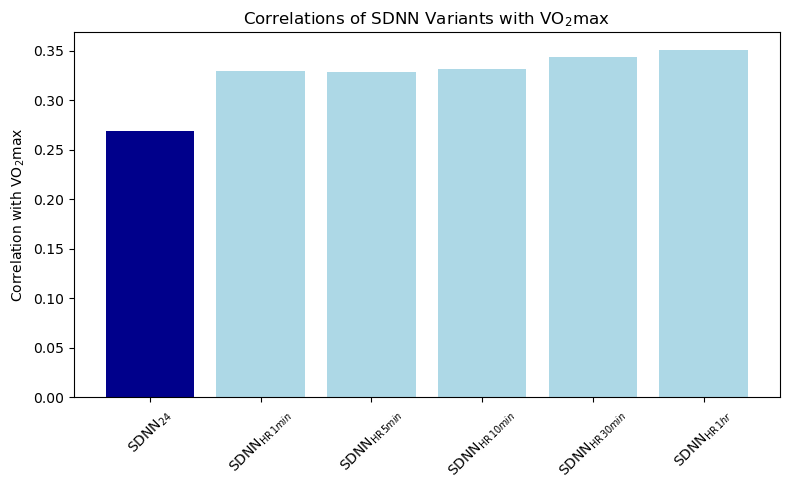

In [46]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import pandas as pd

# List of SDNN variables to correlate with 'vo2peak_measured'
sdnn_vars = ['SDNN24', 'SDNNhr_1min', 'SDNNhr_5min', 'SDNNhr_10min', 
             'SDNNhr_30min', 'SDNNhr_1hr']

# Initialize a dictionary to store correlation results
correlation_data = {}

# Calculate Pearson correlations for each variable
for var in sdnn_vars:
    # Drop rows with missing values for the specific SDNN variable and vo2peak_measured
    valid_data = df[[var, 'vo2peak_measured']].dropna()
    corr, _ = pearsonr(valid_data[var], valid_data['vo2peak_measured'])
    correlation_data[var] = corr

# Update variable names for labels with proper subscripts
updated_variables = [r"SDNN$_{24}$" if var == 'SDNN24' else r"SDNN$_{\mathrm{HR}}$$_{" + var.split('_')[1].replace('min', 'min').replace('hr', 'hr') + "}$" for var in sdnn_vars]

# Bar chart settings
variables = updated_variables
correlations = list(correlation_data.values())

# Define colors: SDNN24 in darker color, others in lighter color
colors = ['darkblue' if "SDNN$_{24}$" in var else 'lightblue' for var in variables]

# Create bar plot
plt.figure(figsize=(8, 5))
plt.bar(variables, correlations, color=colors)

# Add labels and title with correct subscripts
plt.ylabel("Correlation with VO$_{2}$max")
plt.title("Correlations of SDNN Variants with VO$_{2}$max")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()

# Show the plot
plt.show()


### Run a correlation matrix between features before identifying those with highest collinearity

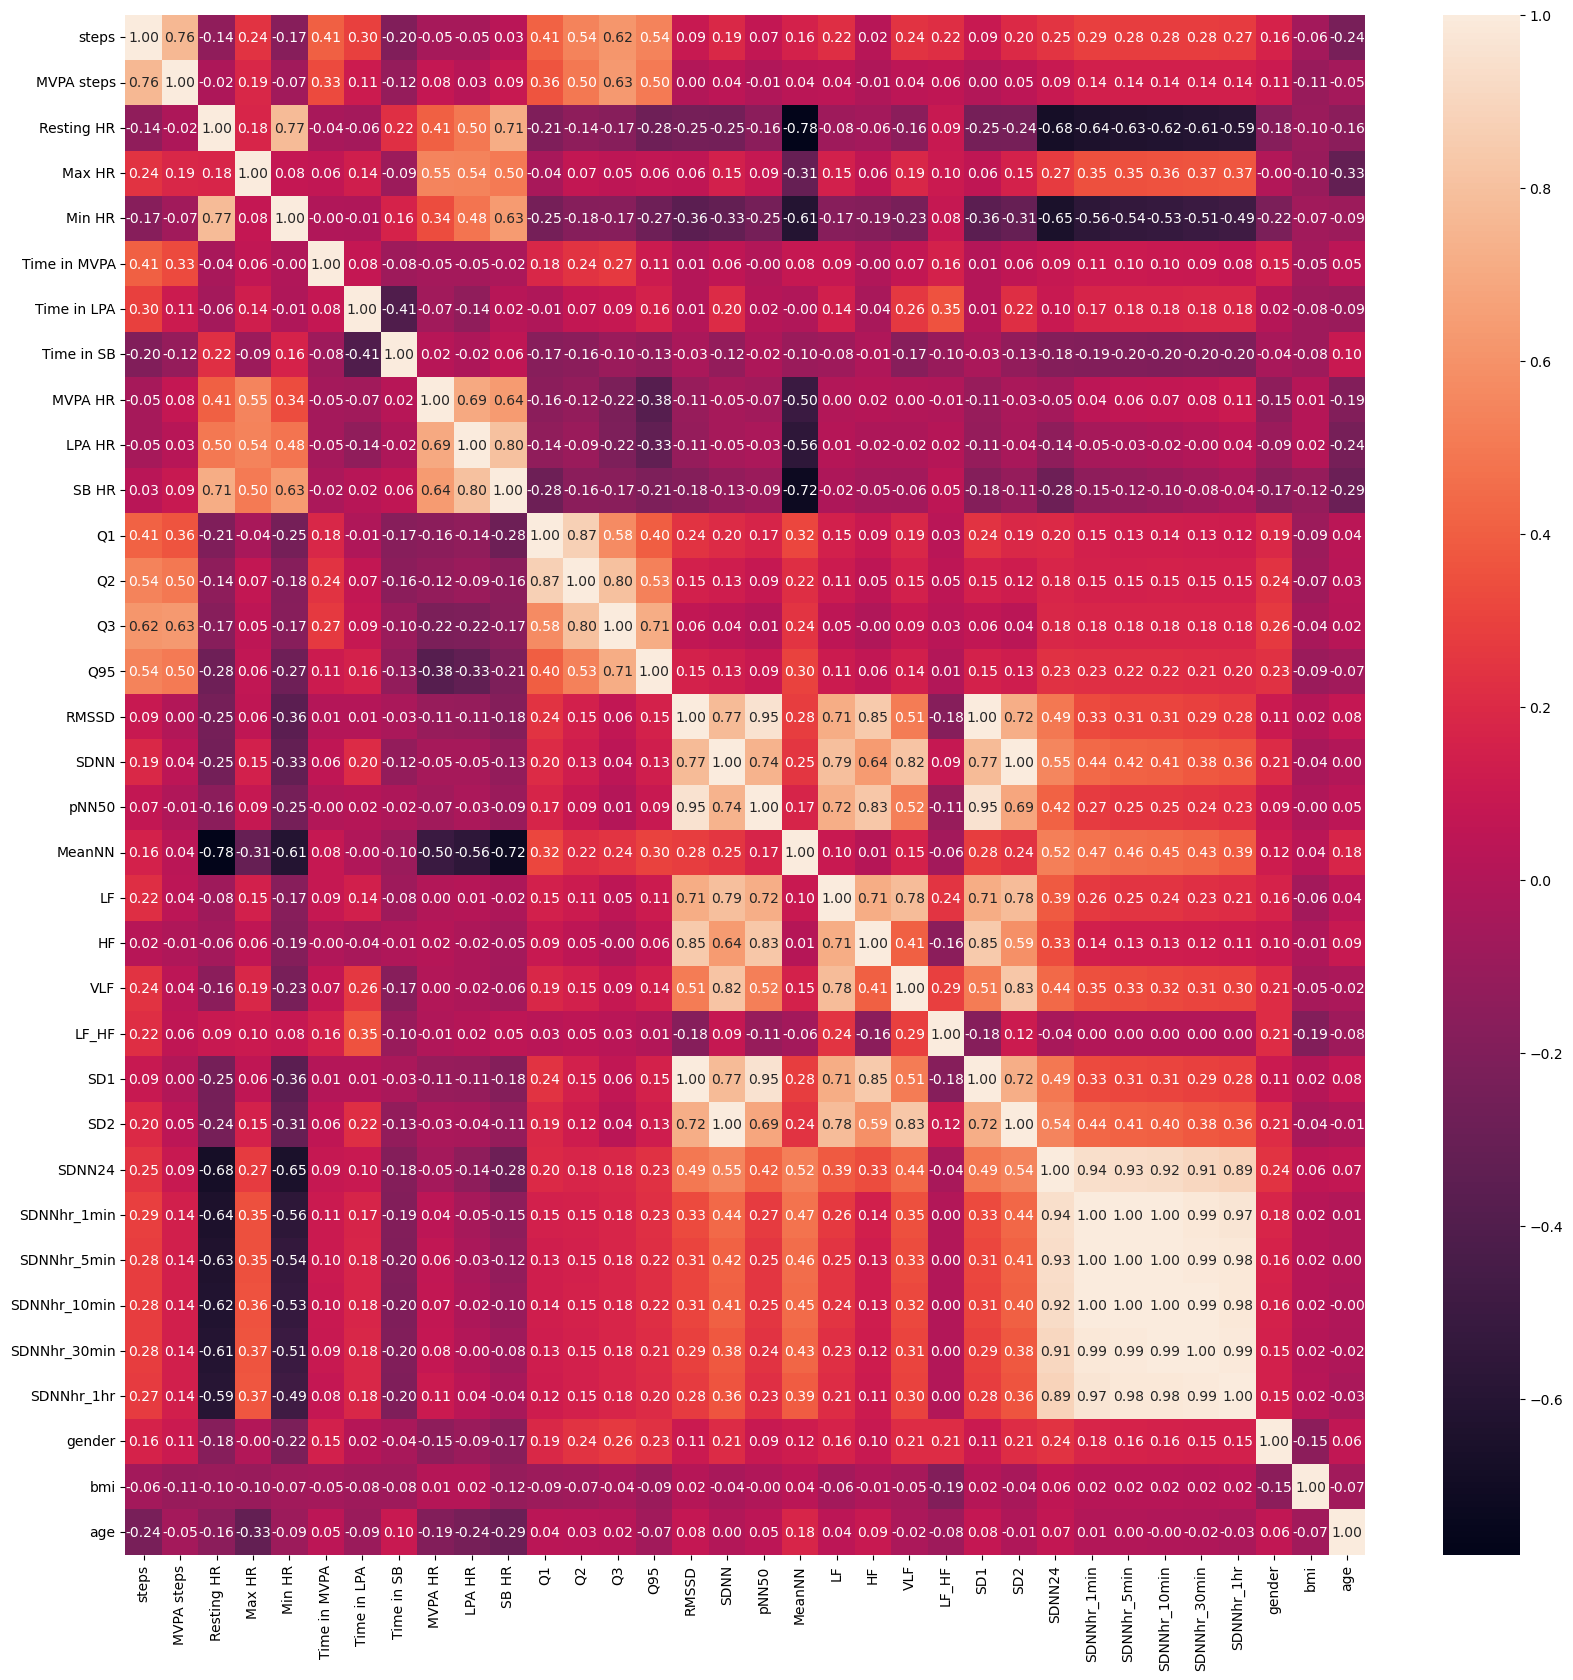

In [48]:
#plot a correlation matrix of all features in df
features = ['steps', 'MVPA steps', 
       'Resting HR', 'Max HR', 'Min HR', 'Time in MVPA', 'Time in LPA',
       'Time in SB', 'MVPA HR', 'LPA HR', 'SB HR', 
        'Q1', 'Q2', 'Q3', 'Q95', 'RMSSD', 'SDNN', 'pNN50', 'MeanNN','LF', 'HF', 'VLF',
       'LF_HF', 'SD1', 'SD2', 'SDNN24',
       'SDNNhr_1min', 'SDNNhr_5min', 'SDNNhr_10min', 'SDNNhr_30min', 'SDNNhr_1hr',
       'gender', 'bmi', 'age']

#using seaborn plot a correlation matrix of all features in df
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(df[features].corr(), annot=True, fmt=".2f")
plt.show()



In [49]:
# Calculate the correlation matrix
correlation_matrix = df[features].corr()

# Find pairs of features with a correlation above 0.9
threshold = 0.9
high_corr_pairs = []

for i in range(len(features)):
    for j in range(i + 1, len(features)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            high_corr_pairs.append(
                (features[i], features[j], correlation_matrix.iloc[i, j])
            )

# Print the pairs with high correlation
print("Features with correlation above 0.9:")
for pair in high_corr_pairs:
    print(f"{pair[0]} and {pair[1]}: {pair[2]:.2f}")



Features with correlation above 0.9:
RMSSD and pNN50: 0.95
RMSSD and SD1: 1.00
SDNN and SD2: 1.00
pNN50 and SD1: 0.95
SDNN24 and SDNNhr_1min: 0.94
SDNN24 and SDNNhr_5min: 0.93
SDNN24 and SDNNhr_10min: 0.92
SDNN24 and SDNNhr_30min: 0.91
SDNNhr_1min and SDNNhr_5min: 1.00
SDNNhr_1min and SDNNhr_10min: 1.00
SDNNhr_1min and SDNNhr_30min: 0.99
SDNNhr_1min and SDNNhr_1hr: 0.97
SDNNhr_5min and SDNNhr_10min: 1.00
SDNNhr_5min and SDNNhr_30min: 0.99
SDNNhr_5min and SDNNhr_1hr: 0.98
SDNNhr_10min and SDNNhr_30min: 0.99
SDNNhr_10min and SDNNhr_1hr: 0.98
SDNNhr_30min and SDNNhr_1hr: 0.99


### From above results can see all feature relationships with correlations >0.9
### From those features that are highly correlated we want to keep in those with strongest associations with VO2max
### Therefore, SD1, pNN50 and SDNN were removed from analysis.

In [50]:
ws = ['steps', 'MVPA steps', 
       'Resting HR', 'Max HR', 'Min HR', 'Time in MVPA', 'Time in LPA',
       'Time in SB', 'SB HR', 
        'Q1', 'Q2', 'Q3', 'Q95', 'pNN50', 'MeanNN','LF', 'HF', 'VLF',
       'LF_HF', 'SD2', 'SDNN24',
       'SDNNhr_1min', 'SDNNhr_5min', 'SDNNhr_10min', 'SDNNhr_30min', 'SDNNhr_1hr',
       'gender', 'bmi', 'age']

print(len(ws))

29


### Next from the LASSO regresssion below we can see that after looping through 0.01 - 1 for alpha, optimal alpha was identifed as 0.3

In [51]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr
import numpy as np

# Prepare data for Lasso regression
X = df[ws]
y = df['vo2peak_measured']

# Handle categorical variable 'gender' (assuming binary categorical: 0 or 1)
X = pd.get_dummies(X, columns=['gender'], drop_first=True)  # Encode if needed

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize LassoCV with 5-fold cross-validation
alphas = np.linspace(0.01, 1, 100)  # Avoid alpha=0 since it leads to OLS
kf = KFold(n_splits=5, shuffle=True, random_state=0)

# Custom loop to calculate correlation for each alpha
alpha_correlations = []
for alpha in alphas:
    fold_correlations = []
    for train_idx, val_idx in kf.split(X_train_scaled):
        # Split train and validation sets
        X_fold_train, X_fold_val = X_train_scaled[train_idx], X_train_scaled[val_idx]
        y_fold_train, y_fold_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
        
        # Train Lasso model
        lasso = LassoCV(alphas=[alpha], cv=None, random_state=42)
        lasso.fit(X_fold_train, y_fold_train)
        
        # Predict on validation set
        y_pred_val = lasso.predict(X_fold_val)
        
        # Calculate Pearson correlation
        correlation, _ = pearsonr(y_fold_val, y_pred_val)
        fold_correlations.append(correlation)
    
    # Store mean correlation for this alpha
    alpha_correlations.append(np.mean(fold_correlations))

# Find the alpha with the highest correlation
best_alpha_idx = np.argmax(alpha_correlations)
best_alpha = alphas[best_alpha_idx]

print(f"Best alpha value (highest correlation): {best_alpha:.4f}")
print(f"Highest mean correlation: {alpha_correlations[best_alpha_idx]:.4f}")

# Train the final model with the best alpha and evaluate on the test set
lasso_best = LassoCV(alphas=[best_alpha], cv=None, random_state=42)
lasso_best.fit(X_train_scaled, y_train)
y_pred_test = lasso_best.predict(X_test_scaled)

# Evaluate on test set
test_correlation, _ = pearsonr(y_test, y_pred_test)
print(f"Test Correlation: {test_correlation:.4f}")


/Users/aronsyversen/miniforge3/envs/hr-env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5342877367472738, tolerance: 0.18973131313953487
  model = cd_fast.enet_coordinate_descent_gram(
/Users/aronsyversen/miniforge3/envs/hr-env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7893207806289411, tolerance: 0.19933494523255813
  model = cd_fast.enet_coordinate_descent_gram(
/Users/aronsyversen/miniforge3/envs/hr-env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5403467201234662, tolerance: 0.17126146523255809
  model = cd_fast.enet_coordinate_descent_gram

Best alpha value (highest correlation): 0.4100
Highest mean correlation: 0.7350
Test Correlation: 0.6080


In [52]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd


# Prepare data for Lasso regression using the cleaned list
X = df[ws]
y = df['vo2peak_measured']

# Handle categorical variable 'gender' (assuming binary categorical: 0 or 1)
X = pd.get_dummies(X, columns=['gender'], drop_first=True)  # Encode if needed

# Proceed with train-test split, scaling, and Lasso regression as before
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lasso = Lasso(alpha=best_alpha)  # Adjust alpha as needed
lasso.fit(X_train_scaled, y_train)

# Print coefficients for feature importance
print("\nLasso Regression Coefficients:")
for feature, coef in zip(X.columns, lasso.coef_):
    print(f"{feature}: {coef}")

# Evaluate the model
y_pred = lasso.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nMean Squared Error: {mse}")
print(f"R-squared: {r2}")

#print the feaures with non-zero coefficients
print("\nFeatures with non-zero coefficients:")
for feature, coef in zip(X.columns, lasso.coef_):
    if coef != 0:
        print(f"{feature}: {coef}")


Lasso Regression Coefficients:
steps: 1.3571560221573047
MVPA steps: 0.0
Resting HR: -0.0
Max HR: 0.0
Min HR: 0.0
Time in MVPA: -0.0
Time in LPA: 0.0
Time in SB: -0.0
SB HR: -0.0
Q1: -0.0
Q2: 0.0
Q3: 0.0
Q95: 0.0
pNN50: -0.0
MeanNN: 0.0
LF: -0.0
HF: -0.0
VLF: 0.0
LF_HF: 0.6728936715907534
SD2: -0.0
SDNN24: 0.0
SDNNhr_1min: 0.0
SDNNhr_5min: 0.0
SDNNhr_10min: 0.0
SDNNhr_30min: 0.0
SDNNhr_1hr: 0.9194389253879318
bmi: -0.6224151501799905
age: -1.1676446639503761
gender_1: 0.583573357545253

Mean Squared Error: 11.651819278285693
R-squared: 0.35359794773366515

Features with non-zero coefficients:
steps: 1.3571560221573047
LF_HF: 0.6728936715907534
SDNNhr_1hr: 0.9194389253879318
bmi: -0.6224151501799905
age: -1.1676446639503761
gender_1: 0.583573357545253


### After implementing the optimal alpha value - 8 features were selected for contribution to final model

In [53]:


features = ['steps', 'age', 'RMSSD', 'MeanNN', 'LF_HF', 'SDNNhr_1hr', 'bmi', 'gender']

features = ['steps', 'age', 'RMSSD', 'MeanNN', 'LF_HF', 'SDNNhr_1hr', 'bmi', 'gender']

#print the avergae and std of the features with non-zero coefficients
for feature in features:
    print(f"Average {feature}:", df[feature].mean())
    print(f"{feature} Standard Deviation:", df[feature].std())

Average steps: 3561.212296842385
steps Standard Deviation: 2882.984592545127
Average age: 68.36094674556213
age Standard Deviation: 11.074150039544234
Average RMSSD: 26.23046118906293
RMSSD Standard Deviation: 19.687972744420232
Average MeanNN: 883.0367277129145
MeanNN Standard Deviation: 127.72582277265029
Average LF_HF: 4.543135230129458
LF_HF Standard Deviation: 6.16335674863327
Average SDNNhr_1hr: 80.09913380291812
SDNNhr_1hr Standard Deviation: 29.20983633872799
Average bmi: 28.781065088757398
bmi Standard Deviation: 5.827173316354464
Average gender: 0.7396449704142012
gender Standard Deviation: 0.4401324117471764


In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.stats import pearsonr


# Define feature sets
feature_sets = {
    "With HRV": ['steps', 'age', 'gender', 'bmi', 'SDNNhr_1hr', 'LF_HF', 'MeanNN', 'RMSSD'],
    "Without HRV": ['steps', 'age', 'gender', 'bmi']
}

# Define feature sets
feature_sets = {
    "With HRV": ['steps', 'age', 'gender', 'bmi', 'SDNNhr_1hr', 'LF_HF'], #'MeanNN', 'RMSSD'],
    "Without HRV": ['steps', 'age', 'gender', 'bmi']
}

# Initialize a dictionary to store results
results = {}

# VO₂max threshold
threshold = 15

# Loop through each feature set
for label, features in feature_sets.items():
    print(f"\nEvaluating Model: {label}")
    
    # Define X (predictors) and y (target)
    X = df[features]
    y = df['vo2peak_measured']

    # Initialize the scaler and scale the entire dataset
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Initialize the Linear Regression model
    model = LinearRegression()

    # Set up 5-fold cross-validation
    kf = KFold(n_splits=10, shuffle=True, random_state=42)

    # Initialize lists to store metrics for each fold
    fold_correlations = []
    fold_mae = []
    fold_rmse = []
    fold_ape = []

    # Additional lists for patients with VO₂max below the threshold
    fold_correlations_below = []
    fold_mae_below = []
    fold_rmse_below = []
    fold_ape_below = []

    # Perform cross-validation manually to calculate metrics for each fold
    for train_index, test_index in kf.split(X_scaled):
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Fit the model on each training fold
        model.fit(X_train, y_train)
        
        # Predict on the test fold
        y_pred_fold = model.predict(X_test)
        
        # Calculate metrics for this fold (all data)
        correlation_fold, _ = pearsonr(y_test, y_pred_fold)
        mae_fold = mean_absolute_error(y_test, y_pred_fold)
        rmse_fold = np.sqrt(mean_squared_error(y_test, y_pred_fold))
        ape_fold = np.mean(np.abs((y_test - y_pred_fold) / y_test) * 100)

        # Append metrics to lists
        fold_correlations.append(correlation_fold)
        fold_mae.append(mae_fold)
        fold_rmse.append(rmse_fold)
        fold_ape.append(ape_fold)

        # Subset for VO₂max < threshold
        below_threshold_indices = y_test < threshold
        y_test_below = y_test[below_threshold_indices]
        y_pred_below = y_pred_fold[below_threshold_indices]

        if len(y_test_below) > 0:  # Ensure there are data points
            correlation_below, _ = pearsonr(y_test_below, y_pred_below)
            mae_below = mean_absolute_error(y_test_below, y_pred_below)
            rmse_below = np.sqrt(mean_squared_error(y_test_below, y_pred_below))
            ape_below = np.mean(np.abs((y_test_below - y_pred_below) / y_test_below) * 100)

            # Append metrics for below-threshold group
            fold_correlations_below.append(correlation_below)
            fold_mae_below.append(mae_below)
            fold_rmse_below.append(rmse_below)
            fold_ape_below.append(ape_below)
    
    

    # Calculate average metrics and std across all folds
    avg_correlation = np.mean(fold_correlations)
    std_correlation = np.std(fold_correlations)
    avg_mae = np.mean(fold_mae)
    std_mae = np.std(fold_mae)
    avg_rmse = np.mean(fold_rmse)
    std_rmse = np.std(fold_rmse)
    avg_ape = np.mean(fold_ape)
    std_ape = np.std(fold_ape)

    avg_correlation_below = np.mean(fold_correlations_below) if fold_correlations_below else None
    std_correlation_below = np.std(fold_correlations_below) if fold_correlations_below else None
    avg_mae_below = np.mean(fold_mae_below) if fold_mae_below else None
    std_mae_below = np.std(fold_mae_below) if fold_mae_below else None
    avg_rmse_below = np.mean(fold_rmse_below) if fold_rmse_below else None
    std_rmse_below = np.std(fold_rmse_below) if fold_rmse_below else None
    avg_ape_below = np.mean(fold_ape_below) if fold_ape_below else None
    std_ape_below = np.std(fold_ape_below) if fold_ape_below else None

    # Store results for this model
    results[label] = {
        "Overall": {
            "Average Correlation": avg_correlation,
            "Std Correlation": std_correlation,
            "Average MAE": avg_mae,
            "Std MAE": std_mae,
            "Average RMSE": avg_rmse,
            "Std RMSE": std_rmse,
            "Average APE": avg_ape,
            "Std APE": std_ape
        },
        f"VO₂max < {threshold}": {
            "Average Correlation": avg_correlation_below,
            "Std Correlation": std_correlation_below,
            "Average MAE": avg_mae_below,
            "Std MAE": std_mae_below,
            "Average RMSE": avg_rmse_below,
            "Std RMSE": std_rmse_below,
            "Average APE": avg_ape_below,
            "Std APE": std_ape_below
        }
    }
# Compare the results
print("\nComparison of Models:")
for label, metrics in results.items():
    print(f"\nModel: {label}")
    for group, group_metrics in metrics.items():
        print(f"  {group}:")
        for metric_name, metric_value in group_metrics.items():
            if metric_value is not None:
                # Check if the metric is paired with a standard deviation
                if "Std" not in metric_name:
                    std_metric_name = f"Std {metric_name.split(' ')[1]}"  # Match the corresponding Std metric
                    if std_metric_name in group_metrics:
                        print(f"    {metric_name}: {metric_value:.4f} ({group_metrics[std_metric_name]:.4f})")
                    else:
                        print(f"    {metric_name}: {metric_value:.4f}")
            else:
                print(f"    {metric_name}: N/A (No Data)")


Evaluating Model: With HRV

Evaluating Model: Without HRV

Comparison of Models:

Model: With HRV
  Overall:
    Average Correlation: 0.7329 (0.1303)
    Average MAE: 2.4967 (0.5431)
    Average RMSE: 3.2114 (0.7735)
    Average APE: 14.6143 (3.1275)
  VO₂max < 15:
    Average Correlation: 0.4232 (0.3512)
    Average MAE: 2.5008 (0.7570)
    Average RMSE: 2.7699 (0.8247)
    Average APE: 20.2525 (7.5671)

Model: Without HRV
  Overall:
    Average Correlation: 0.6840 (0.1280)
    Average MAE: 2.6832 (0.5137)
    Average RMSE: 3.4434 (0.7330)
    Average APE: 15.7785 (2.5326)
  VO₂max < 15:
    Average Correlation: 0.3628 (0.3871)
    Average MAE: 2.7937 (0.6420)
    Average RMSE: 3.1739 (0.7362)
    Average APE: 22.6934 (7.1956)


In [80]:
from scipy.stats import t

# Function to calculate confidence intervals
def calculate_ci(mean, std, n, confidence=0.95):
    """Calculate confidence interval using the t-distribution."""
    t_value = t.ppf((1 + confidence) / 2, df=n - 1)
    margin_of_error = t_value * (std / np.sqrt(n))
    lower_bound = mean - margin_of_error
    upper_bound = mean + margin_of_error
    return lower_bound, upper_bound

# Loop through each model's results
for label, metrics in results.items():
    for group, group_metrics in metrics.items():
        # Collect new items to add (to avoid modifying the dictionary during iteration)
        new_items = []
        for metric_name, metric_value in group_metrics.items():
            if "Std" not in metric_name and metric_value is not None:
                # Identify corresponding Std metric
                std_metric_name = f"Std {metric_name.split(' ')[1]}"
                if std_metric_name in group_metrics and group_metrics[std_metric_name] is not None:
                    # Calculate CI for the metric
                    std_value = group_metrics[std_metric_name]
                    n_folds = 10  # Number of folds in cross-validation
                    ci_lower, ci_upper = calculate_ci(metric_value, std_value, n_folds)
                    new_items.append((f"{metric_name} CI", (ci_lower, ci_upper)))

        # Update the dictionary after iterating over it
        for new_key, new_value in new_items:
            group_metrics[new_key] = new_value

# Print Results with Confidence Intervals
print("\nComparison of Models with Confidence Intervals:")
for label, metrics in results.items():
    print(f"\nModel: {label}")
    for group, group_metrics in metrics.items():
        print(f"  {group}:")
        for metric_name, metric_value in group_metrics.items():
            if "CI" in metric_name:
                # Format CI output
                print(f"    {metric_name}: [{metric_value[0]:.4f}, {metric_value[1]:.4f}]")
            elif metric_value is not None and "Std" not in metric_name:
                std_metric_name = f"Std {metric_name.split(' ')[1]}"
                if std_metric_name in group_metrics:
                    print(f"    {metric_name}: {metric_value:.4f} ({group_metrics[std_metric_name]:.4f})")
                else:
                    print(f"    {metric_name}: {metric_value:.4f}")



Comparison of Models with Confidence Intervals:

Model: With HRV
  Overall:
    Average Correlation: 0.7329 (0.1303)
    Average MAE: 2.4967 (0.5431)
    Average RMSE: 3.2114 (0.7735)
    Average APE: 14.6143 (3.1275)
    Average Correlation CI: [0.6397, 0.8261]
    Average MAE CI: [2.1082, 2.8852]
    Average RMSE CI: [2.6581, 3.7647]
    Average APE CI: [12.3770, 16.8515]
  VO₂max < 15:
    Average Correlation: 0.4232 (0.3512)
    Average MAE: 2.5008 (0.7570)
    Average RMSE: 2.7699 (0.8247)
    Average APE: 20.2525 (7.5671)
    Average Correlation CI: [0.1719, 0.6744]
    Average MAE CI: [1.9593, 3.0423]
    Average RMSE CI: [2.1799, 3.3598]
    Average APE CI: [14.8393, 25.6656]

Model: Without HRV
  Overall:
    Average Correlation: 0.6840 (0.1280)
    Average MAE: 2.6832 (0.5137)
    Average RMSE: 3.4434 (0.7330)
    Average APE: 15.7785 (2.5326)
    Average Correlation CI: [0.5924, 0.7756]
    Average MAE CI: [2.3157, 3.0507]
    Average RMSE CI: [2.9191, 3.9678]
    Average A

#### Final model results are seen with HRV model slightly outperforming across all metrics

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.stats import pearsonr

# Define feature sets
feature_sets = {
    "With HRV": ['steps', 'age', 'gender', 'bmi', 'SDNNhr_1hr', 'LF_HF'], #'MeanNN', 'RMSSD'],
    "Without HRV": ['steps', 'age', 'gender', 'bmi']
}

# Initialize a dictionary to store results
results = {}

# VO₂max threshold
threshold = 15


# Loop through each feature set
for label, features in feature_sets.items():
    print(f"\nEvaluating Model: {label}")

    # Initialize a nested dictionary for the label if not already present
    if label not in results:
        results[label] = {}

    # Define X (predictors) and y (target)
    X = df[features]
    y = df['vo2peak_measured']

    # Initialize the scaler and scale the entire dataset
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Initialize the Linear Regression model
    model = LinearRegression()

    # Set up 10-fold cross-validation
    kf = KFold(n_splits=10, shuffle=True, random_state=42)

    # Initialize lists to store metrics for each fold
    fold_correlations = []
    fold_mae = []
    fold_rmse = []
    fold_ape = []

    # Additional lists for patients with VO₂max below the threshold
    fold_correlations_below = []
    fold_mae_below = []
    fold_rmse_below = []
    fold_ape_below = []

    # Perform cross-validation manually to calculate metrics for each fold
    for train_index, test_index in kf.split(X_scaled):
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Fit the model on each training fold
        model.fit(X_train, y_train)
        
        # Predict on the test fold
        y_pred_fold = model.predict(X_test)
        
        # Calculate metrics for this fold (all data)
        correlation_fold, _ = pearsonr(y_test, y_pred_fold)
        mae_fold = mean_absolute_error(y_test, y_pred_fold)
        rmse_fold = np.sqrt(mean_squared_error(y_test, y_pred_fold))
        ape_fold = np.mean(np.abs((y_test - y_pred_fold) / y_test) * 100)

        # Append metrics to lists
        fold_correlations.append(correlation_fold)
        fold_mae.append(mae_fold)
        fold_rmse.append(rmse_fold)
        fold_ape.append(ape_fold)

        # Subset for VO₂max < threshold
        below_threshold_indices = y_test < threshold
        y_test_below = y_test[below_threshold_indices]
        y_pred_below = y_pred_fold[below_threshold_indices]

        if len(y_test_below) > 0:  # Ensure there are data points
            correlation_below, _ = pearsonr(y_test_below, y_pred_below)
            mae_below = mean_absolute_error(y_test_below, y_pred_below)
            rmse_below = np.sqrt(mean_squared_error(y_test_below, y_pred_below))
            ape_below = np.mean(np.abs((y_test_below - y_pred_below) / y_test_below) * 100)

            # Append metrics for below-threshold group
            fold_correlations_below.append(correlation_below)
            fold_mae_below.append(mae_below)
            fold_rmse_below.append(rmse_below)
            fold_ape_below.append(ape_below)
    
    # Store fold-level metrics for each model
    results[label]["Fold-Level"] = {
        "Correlation": fold_correlations,
        "MAE": fold_mae,
        "RMSE": fold_rmse,
        "APE": fold_ape
    }

    # Store fold-level metrics for below-threshold subset
    results[label][f"VO₂max < {threshold}"] = {
        "Fold-Level": {
            "Correlation": fold_correlations_below,
            "MAE": fold_mae_below,
            "RMSE": fold_rmse_below,
            "APE": fold_ape_below
        },
        "Overall": {
            "Average Correlation": np.mean(fold_correlations_below) if fold_correlations_below else None,
            "Std Correlation": np.std(fold_correlations_below) if fold_correlations_below else None,
            "Average MAE": np.mean(fold_mae_below) if fold_mae_below else None,
            "Std MAE": np.std(fold_mae_below) if fold_mae_below else None,
            "Average RMSE": np.mean(fold_rmse_below) if fold_rmse_below else None,
            "Std RMSE": np.std(fold_rmse_below) if fold_rmse_below else None,
            "Average APE": np.mean(fold_ape_below) if fold_ape_below else None,
            "Std APE": np.std(fold_ape_below) if fold_ape_below else None
        }
    }

    # Calculate average metrics and std across all folds for all data
    results[label]["Overall"] = {
        "Average Correlation": np.mean(fold_correlations),
        "Std Correlation": np.std(fold_correlations),
        "Average MAE": np.mean(fold_mae),
        "Std MAE": np.std(fold_mae),
        "Average RMSE": np.mean(fold_rmse),
        "Std RMSE": np.std(fold_rmse),
        "Average APE": np.mean(fold_ape),
        "Std APE": np.std(fold_ape)
    }

from scipy.stats import ttest_rel, shapiro

# Initialize a dictionary to store t-test results
t_test_results = {
    "Whole Dataset": {},
    f"VO₂max < {threshold}": {}
}

# Metrics to compare
metrics = ["Correlation", "MAE", "RMSE", "APE"]

# Run paired t-tests for the whole dataset
for metric in metrics:
    print(f"\nPaired t-Test for Whole Dataset - {metric}")

    # Extract data for both groups
    data_with_hrv = results["With HRV"]["Fold-Level"][metric]
    data_without_hrv = results["Without HRV"]["Fold-Level"][metric]

    # Check normality of differences
    differences = [a - b for a, b in zip(data_with_hrv, data_without_hrv)]
    stat, p_value = shapiro(differences)
    print(f"  Shapiro-Wilk Test for Differences: statistic = {stat:.4f}, p-value = {p_value:.4f}")

    # Run paired t-test if differences are normal
    if p_value > 0.05:
        t_stat, p_val = ttest_rel(data_with_hrv, data_without_hrv)
        t_test_results["Whole Dataset"][metric] = {"t-statistic": t_stat, "p-value": p_val}
        print(f"  Paired t-Test: t-statistic = {t_stat:.4f}, p-value = {p_val:.4f}")
    else:
        print(f"  Differences are not normally distributed. Consider using a non-parametric test.")


Evaluating Model: With HRV

Evaluating Model: Without HRV

Paired t-Test for Whole Dataset - Correlation
  Shapiro-Wilk Test for Differences: statistic = 0.8809, p-value = 0.1335
  Paired t-Test: t-statistic = 3.1690, p-value = 0.0114

Paired t-Test for Whole Dataset - MAE
  Shapiro-Wilk Test for Differences: statistic = 0.8927, p-value = 0.1821
  Paired t-Test: t-statistic = -2.4570, p-value = 0.0363

Paired t-Test for Whole Dataset - RMSE
  Shapiro-Wilk Test for Differences: statistic = 0.9189, p-value = 0.3481
  Paired t-Test: t-statistic = -3.0135, p-value = 0.0146

Paired t-Test for Whole Dataset - APE
  Shapiro-Wilk Test for Differences: statistic = 0.8899, p-value = 0.1693
  Paired t-Test: t-statistic = -3.1408, p-value = 0.0119


### After running the Shapiro-Wilks test to check for normality of distribution - we can see these assumptions are met.
### Appropriate test is the dependent t-test to check for differences in results



In [24]:
from scipy.stats import ttest_rel

# Initialize a dictionary to store paired t-test results
paired_ttest_results = {}

# Metrics to compare
metrics = ["Correlation", "MAE", "RMSE", "APE"]

# Perform paired t-tests for each metric across all folds
for metric in metrics:
    print(f"\nPerforming paired t-test for {metric}...")

    # Access fold-level data for both models
    data_with_hrv = results["With HRV"]["Fold-Level"][metric]
    data_without_hrv = results["Without HRV"]["Fold-Level"][metric]

    # Perform paired t-test
    t_stat, p_value = ttest_rel(data_with_hrv, data_without_hrv)

    # Store results
    paired_ttest_results[metric] = {
        "t-statistic": t_stat,
        "p-value": p_value
    }

    # Print results
    print(f"  t-statistic: {t_stat:.4f}")
    print(f"  p-value: {p_value:.4f}")
    if p_value < 0.05:
        print("  -> Significant difference (p < 0.05)")
    else:
        print("  -> No significant difference (p ≥ 0.05)")

# Summary of all t-tests
print("\nSummary of Paired t-Test Results:")
for metric, result in paired_ttest_results.items():
    print(f"{metric}: t-statistic = {result['t-statistic']:.4f}, p-value = {result['p-value']:.4f}")
    if result["p-value"] < 0.05:
        print("  -> Significant difference (p < 0.05)")
    else:
        print("  -> No significant difference (p ≥ 0.05)")



Performing paired t-test for Correlation...
  t-statistic: 3.1690
  p-value: 0.0114
  -> Significant difference (p < 0.05)

Performing paired t-test for MAE...
  t-statistic: -2.4570
  p-value: 0.0363
  -> Significant difference (p < 0.05)

Performing paired t-test for RMSE...
  t-statistic: -3.0135
  p-value: 0.0146
  -> Significant difference (p < 0.05)

Performing paired t-test for APE...
  t-statistic: -3.1408
  p-value: 0.0119
  -> Significant difference (p < 0.05)

Summary of Paired t-Test Results:
Correlation: t-statistic = 3.1690, p-value = 0.0114
  -> Significant difference (p < 0.05)
MAE: t-statistic = -2.4570, p-value = 0.0363
  -> Significant difference (p < 0.05)
RMSE: t-statistic = -3.0135, p-value = 0.0146
  -> Significant difference (p < 0.05)
APE: t-statistic = -3.1408, p-value = 0.0119
  -> Significant difference (p < 0.05)


### Significant differences were found in 3/4 metrics, although the RMSE metric is only slighty above alpha of .05

In [103]:
#print the number of patients with VO2max below the threshold
threshold = 15
num_below_threshold = (merged_df['vo2peak_measured'] < threshold).sum()
print(f"Number of patients with VO₂max < {threshold}: {num_below_threshold}")

Number of patients with VO₂max < 15: 51
